#TRAIN SECTION 

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)   
import os 
os.chdir("/content/drive/My Drive")

Mounted at /content/drive


In [ ]:
#Import lib
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image 
import os
from tensorflow.keras.utils import image_dataset_from_directory, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adagrad 
from tensorflow.keras.metrics import Recall, Precision, Accuracy
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import models 

# Data preparation

Get frames from videos

In [ ]:
import cv2
import os
import time 

directory = os.fsencode('/content/drive/MyDrive/BTL CV 20212/CV/Video ')
    
for file in os.listdir(directory):
  filename = os.fsdecode(file)
  if filename.endswith(".mp4"): 
    success = True
    path = '/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/' + filename[:-4]
    os.makedirs(path, exist_ok=True)
    print (path)
    vidcap = cv2.VideoCapture('/content/drive/MyDrive/BTL CV 20212/CV/Video /' + filename)
    if vidcap.isOpened():
      count = 0
      success, image = vidcap.read()
      while success:
        if count % 5 == 0:
          cv2.imwrite(os.path.join(path , f'{count/5}.jpg'), image)   
        count += 1
        success, image = vidcap.read()

/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Tuan
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Truong
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Linh
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Hieu
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Quan
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/XAnh
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Tan
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Duc
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Kien
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/VDuc
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Hung
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Thang
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/HDuc
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Thu
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Chau
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/LeVan
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/Van
/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/VAnh


Detect face

In [ ]:
!pip install retina-face

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import os
import cv2

save_path = '/content/drive/MyDrive/BTL CV 20212/CV/faces'
path = '/content/drive/MyDrive/BTL CV 20212/CV/Dataframe/'

for folder in os.listdir(path):
  if (folder != 'Unknown'):
    continue;
  print (folder )
  files = path + "/" + folder

  path_to_save = save_path + "/" + folder  
  os.mkdir(path_to_save)

  count = 0

  for f in os.listdir(files):
    print (f)
    image_path = files + "/" + f

    res = RetinaFace.detect_faces(img_path = image_path)

    # check if RetinaFace cannot detect face
    if (isinstance(res, tuple)):
      continue;

    axis = res["face_1"]["facial_area"]

    img = cv2.imread(image_path)
    cropped_image = img[axis[1]:axis[3], axis[0]:axis[2]]

    cv2.imwrite(os.path.join(path_to_save, f"{count}.jpg"), cropped_image) 
    count += 1


Unknown
20160613-024757-7b60002687fd20a9a57_358x441.jpg
Directory  /root /.deepface created
Directory  /root /.deepface/weights created
retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:02<00:00, 47.1MB/s]


1625992439-590a8d3328532898afe5b8d4585918e0-width650height650.jpg
1625992440-d8ac63c4cc011c57134dc171a78cc958-width709height914.jpg
20160613-024809-7a600076ee4905045d3_354x413.jpg
0d18b7af57d7fdf390edafb21403cfa4.jpg
61103071_2361422507447925_6222318223514140672_n_1.jpg
20160613-025009-7a600076efcb41c5cf0_358x441.jpg
20160613-024236-7b600026877f9ec5f6f_358x441.jpg
20160613-023934-7b6000268758bc5fda2_358x441.jpg
20160613-024008-7a600076edbdd99d8b2_358x441.jpg
20160613-023940-7a600076edc688f7b99_358x441.jpg
sao-viet-anh-the-6-5e5ce18c77901.jpg
ngo-ngang-voi-ve-dep-cua-hot-girl-anh-the-chua-tron-18-docx-1622043349706.webp
taeheejpg1349493486.jpg
mau-anh-the-dep-lam-the-can-cuoc.jpg
photographer-156784.jpg
seohyun10jpg1349492983.jpg
nhan-sac-cua-kim-bum-anh-the-ma-trong-nhu-tac-tuong-94e178d0.jpg
photo-1-1590311162571565188046.jpg
luu-diec-phi.webp
review-3-tim-chp-nh-th-ly-ngay-p-nht-h-giang-nm-2021-032.jpg
jhjh-1-768x1024.jpg
le-ly-lan-huong-01.webp
images (6).jpg
images.jpg
img0096-1592

# PCA

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [ ]:
train_faces = []
y = []
classes = []

path = '/content/drive/MyDrive/BTL CV 20212/CV/faces/'

i = 0
for folder in os.listdir(path):
    classes.append(folder)
    a = 0
    print(folder +': ' + str(i))
    for filename in os.listdir(os.path.join(path, folder)):
        y.append(i)
        
        img = load_img(path + '/' + folder + '/' + filename, target_size=(299, 299))
        img_arr = img_to_array(img)
        image = np.expand_dims(img_arr, 0)
        # image = preprocess_input(image)

        image_gray = np.mean(image, axis=3)
        train_faces.append(image_gray)
        a += 1
    print('Added {} images of {}'.format(a, folder))
    print('')
    i += 1
# classes.append(i)

Thu: 0
Added 46 images of Thu

Chau: 1
Added 115 images of Chau

LeVan: 2
Added 111 images of LeVan

VAnh: 3
Added 120 images of VAnh

Linh: 4
Added 71 images of Linh

Thang: 5
Added 85 images of Thang

Kien: 6
Added 73 images of Kien

Van: 7
Added 74 images of Van

Tan: 8
Added 82 images of Tan

Quan: 9
Added 71 images of Quan

Tuan: 10
Added 77 images of Tuan

Truong: 11
Added 83 images of Truong

XAnh: 12
Added 72 images of XAnh

Hieu: 13
Added 74 images of Hieu

Hung: 14
Added 72 images of Hung

HDuc: 15
Added 88 images of HDuc

Duc: 16
Added 72 images of Duc

VDuc: 17
Added 77 images of VDuc

Unknown: 18
Added 55 images of Unknown



In [ ]:
train_faces = np.concatenate(train_faces, axis=0)

In [ ]:
target_names = np.array(classes)
y = np.array(y)

In [ ]:
X = []
for face in train_faces:
  X.append(face.flatten())
 
# Create facematrix as (n_samples,n_pixels) matrix
X = np.array(X)

In [ ]:
print(X.shape)

(1518, 89401)


In [ ]:
n_samples, h, w = train_faces.shape
n_classes = target_names.shape[0]
n_features = X.shape[1]

print("Number of Data Samples: % d" % n_samples)
print("Size of a data sample: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)

Number of Data Samples:  1518
Size of a data sample:  89401
Number of Class Labels:  19


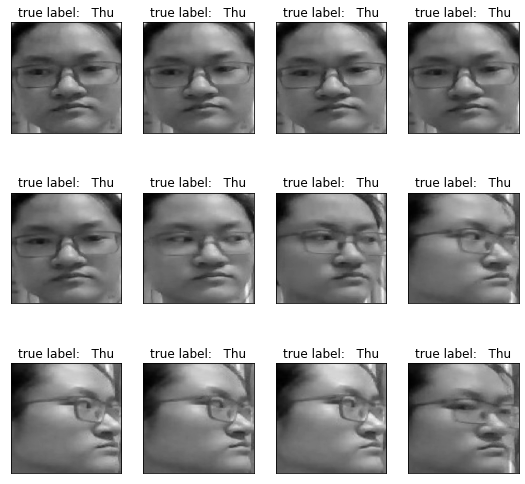

In [ ]:
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())
 
# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)
 
true_titles = [true_title(y, target_names, i) for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("size of training Data is % d and Testing Data is % d" %(
        y_train.shape[0], y_test.shape[0]))

size of training Data is  1138 and Testing Data is  380


In [ ]:
n_components = 150
 
pca = PCA(n_components = n_components, svd_solver ='randomized',
          whiten = True).fit(X_train)
 
eigenfaces = pca.components_.reshape((n_components, h, w))
 
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Projecting the input data on the eigenfaces orthonormal basis


In [ ]:
pca = PCA().fit(X_train)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(X_train, y_train, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

KeyboardInterrupt: ignored

# SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [ ]:
print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel ='rbf', class_weight ='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
 
print("Predicting people's names on the test set")
y_pred = clf.predict(X_test_pca)
# print classification results
print(classification_report(y_test, y_pred, target_names = target_names))
# print confusion matrix

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.001)
Predicting people's names on the test set
              precision    recall  f1-score   support

         Thu       1.00      1.00      1.00         9
        Chau       1.00      1.00      1.00        24
       LeVan       1.00      1.00      1.00        29
        VAnh       1.00      1.00      1.00        31
        Linh       1.00      1.00      1.00        22
       Thang       1.00      1.00      1.00        17
        Kien       0.95      1.00      0.98        21
         Van       0.94      1.00      0.97        16
         Tan       1.00      1.00      1.00        17
        Quan       0.89      0.84      0.86        19
        Tuan       0.93      1.00      0.97        14
      Truong       1.00      1.00      1.00        26
        XAnh       1.00      0.89      0.94        18
        Hieu       1.00      1.00      1.00        18
        Hung   

# TEST

In [ ]:
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import os
import cv2

save_path = '/content/drive/MyDrive/BTL CV 20212/CV/test_faces'
path = '/content/drive/MyDrive/BTL CV 20212/CV/test_dataframe/'

for folder in os.listdir(path):
  print (folder )
  files = path + "/" + folder

  path_to_save = save_path + "/" + folder  
  os.mkdir(path_to_save)

  count = 0

  for f in os.listdir(files):
    print (f)
    image_path = files + "/" + f

    res = RetinaFace.detect_faces(img_path = image_path)

    # check if RetinaFace cannot detect face
    if (isinstance(res, tuple)):
      continue;

    axis = res["face_1"]["facial_area"]

    img = cv2.imread(image_path)
    cropped_image = img[axis[1]:axis[3], axis[0]:axis[2]]

    cv2.imwrite(os.path.join(path_to_save, f"{count}.jpg"), cropped_image) 
    count += 1


Chau
1.0.jpg
2.0.jpg
3.0.jpg
4.0.jpg
5.0.jpg
VAnh
1.0.jpg
2.0.jpg
3.0.jpg
4.0.jpg
Unknown
1.jpg
images.jpg
close-up-face-of-asian-smiling-attractive-woman-talking-and-looking-at-camera-in-office-happy-business-woman-designer-look-at-camera-and-smile-via-online-call-free-video.jpg
istockphoto-1362830342-640x640.jpg
Thu
WIN_20220703_11_35_30_Pro.jpg
WIN_20220703_11_35_38_Pro.jpg
WIN_20220703_11_35_24_Pro.jpg
WIN_20220703_11_34_46_Pro.jpg
WIN_20220703_11_33_50_Pro.jpg


In [ ]:
test_faces = []
test_y = []

path = '/content/drive/MyDrive/BTL CV 20212/CV/test_faces/'

i = 0
for folder in os.listdir(path):
    a = 0
    print(folder +': ' + str(i))
    for filename in os.listdir(os.path.join(path, folder)):
        test_y.append(np.where(target_names == folder)[0][0])
        
        img = load_img(path + '/' + folder + '/' + filename, target_size=(299, 299))
        img_arr = img_to_array(img)
        image = np.expand_dims(img_arr, 0)
        # image = preprocess_input(image)

        image_gray = np.mean(image, axis=3)
        test_faces.append(image_gray)
        a += 1
    print('Added {} images of {}'.format(a, folder))
    print('')
    i += 1

Chau: 0
Added 5 images of Chau

VAnh: 1
Added 4 images of VAnh

Unknown: 2
Added 4 images of Unknown

Thu: 3
Added 5 images of Thu



In [ ]:
test_faces = np.concatenate(test_faces, axis=0)
test_y = np.array(test_y)

In [ ]:
print(test_y)

[1, 1, 1, 1, 1, 3, 3, 3, 3, 18, 18, 18, 18, 0, 0, 0, 0, 0]


In [ ]:
test_x = []
for face in test_faces:
    test_x.append(face.flatten())
 
# Create facematrix as (n_samples,n_pixels) matrix
test_x = np.array(test_x)

In [ ]:
x_test_pca = pca.transform(test_x)

In [ ]:
print(x_test_pca.shape)

(9, 1097)


In [ ]:
y_pred = clf.predict(x_test_pca)
i = 0
for pred in y_pred:
  print('real: ' + target_names[test_y[i]] + ' - predict: ' + target_names[y_pred[i]])
  i += 1

real: Chau - predict: Chau
real: Chau - predict: Chau
real: Chau - predict: Chau
real: Chau - predict: Chau
real: Chau - predict: Chau
real: VAnh - predict: Thu
real: VAnh - predict: VAnh
real: VAnh - predict: Thu
real: VAnh - predict: VAnh
real: Unknown - predict: Chau
real: Unknown - predict: Unknown
real: Unknown - predict: Unknown
real: Unknown - predict: Van
real: Thu - predict: VAnh
real: Thu - predict: VAnh
real: Thu - predict: Quan
real: Thu - predict: Thu
real: Thu - predict: VAnh


In [ ]:
import joblib

pca = joblib.load("pca.pkl")

In [ ]:
clf = joblib.load("model4.pkl")

# SAVE MODEL



In [ ]:
import joblib

joblib.dump(clf, "model4.pkl") 
joblib.dump(pca, "pca.pkl") 

['pca.pkl']

In [ ]:
x1 = x_test_pca[0].reshape(1,-1)
y1 = clf.predict(x1)
print(y1)

[1]


In [ ]:
print(classes)

['Thu', 'Chau', 'LeVan', 'VAnh', 'Linh', 'Thang', 'Kien', 'Van', 'Tan', 'Quan', 'Tuan', 'Truong', 'XAnh', 'Hieu', 'Hung', 'HDuc', 'Duc', 'VDuc', 'Unknown']


In [ ]:
import joblib

model = joblib.load("model4.pkl")

# FastAPI

In [ ]:
!pip install colabcode
!pip install fastapi
!pip install python-multipart
!ngrok config add-authtoken 2BOQszqGxgqykaxUl37HqQdo9yW_7g8iEo1ujw6qCu6Tq61dd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.3 MB 4.7 MB/s 
     |████████████████████████████████| 745 kB 38.2 MB/s 
     |████████████████████████████████| 45 kB 3.4 MB/s 
     |████████████████████████████████| 428 kB 44.5 MB/s 
     |████████████████████████████████| 9.7 MB 29.1 MB/s 
     |████████████████████████████████| 344 kB 42.3 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 58 kB 5.9 MB/s 
     |████████████████████████████████| 132 kB 44.2 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 80 kB 8.7 MB/s 
     |████████████████████████████████| 561 kB 45.6 MB/s 
     |████████████████████████████████| 131 kB 47.4 MB/s 
     |████████████████████████████████| 131 kB 44.7 MB/s 
     |████████████████████████████████| 130 kB 45.7 MB/s 
     |████████████████████████████████| 13

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 63 kB 123 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=fe51a00d5f191fb3b793155da008c4697e88fd802495c34e8d88638977ea5de4
  Stored in directory: /root/.cache/pip/wheels/2c/41/7c/bfd1c180534ffdcc0972f78c5758f89881602175d48a8bcd2c
Successfully built python-multipart
NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open

In [ ]:
from colabcode import ColabCode
from fastapi import FastAPI

In [ ]:
cc = ColabCode(port=12000, code=False)

In [ ]:
# Load image uploaded by user
# Preprocessing
# Predict
# Return result
from fastapi import FastAPI, File, UploadFile
#from prediction import predict, read_image
import tensorflow as tf
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
import numpy as np
from io import BytesIO
from PIL import Image
import pickle
import joblib

app = FastAPI()

global pca, model

with open("pca.pkl", 'rb') as f1:
    pca = joblib.load(f1)


with open("model4.pkl", 'rb') as f2:
    model = joblib.load(f2)

print (model)

@app.post("/predict-tf/image")
async def predict_api(file: UploadFile = File(...)):
    extension = file.filename.split(".")[-1] in ("jpg", "jpeg", "png")
    if not extension:
        return "Image must be jpg or png format!"

    image = Image.open(BytesIO(await file.read()))

    model = tf.keras.models.load_model("model4.h5")

    image = img_to_array(image.resize((299, 299)))
    image = np.expand_dims(image, 0)
    image = preprocess_input(image)

    res = model.predict(image)

    response = {"class": res.argmax()}

    return response


@app.post("/predict-svm/image")
async def predict_api(file: UploadFile = File(...)):
    extension = file.filename.split(".")[-1] in ("jpg", "jpeg", "png")
    if not extension:
        return "Image must be jpg or png format!"

    image = Image.open(BytesIO(await file.read()))

    image = img_to_array(image.resize((299, 299)))
    image = np.expand_dims(image, 0)
#     image = preprocess_input(image)
    image = np.mean(image, axis=3)
    x = image.flatten()
    x = x.reshape(1, -1)


    x = pca.transform(x)

#     x = x.reshape(-1, 1)

    res = model.predict(x)

    return res

    response = {"class": res.argmax()}

    return response

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]})


In [ ]:
cc.run_app(app=app)

Public URL: NgrokTunnel: "https://575c-34-68-154-46.ngrok.io" -> "http://localhost:12000"


INFO:     Started server process [61]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)


In [ ]:
# One-hot encoding
lb = LabelBinarizer()
y = lb.fit_transform(y)
#normalize
x = x/255

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
augument = ImageDataGenerator(rotation_range = 30,
                              zoom_range = 0.1,
                              shear_range = 0.2, 
                              width_shift_range = 0.2,
                              height_shift_range = 0.2,
                              horizontal_flip = True, 
                              vertical_flip = True,
                              validation_split = 0.2)

In [ ]:
vgg16 = VGG16(weights='imagenet', 
              include_top=False,
              input_shape=(299,299,3))

In [ ]:
resnet = InceptionResNetV2(weights='imagenet', 
              include_top=False,
              input_shape=(299,299,3))

In [ ]:
num_classes = 14

model = Sequential([
        resnet,
#        vgg16,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
#        BatchNormalization(),
#        Dropout(0.2),
#        Dense(512, activation='relu'),
#        Dropout(0.3),
        BatchNormalization(),
        Dense(256, activation='relu'),
#        Dropout(0.3),
#        BatchNormalization(),
        Dense(128, activation='relu'),
#        Dropout(0.3),
#        BatchNormalization(),
        Dense(num_classes, activation='softmax')                   
])

model.summary()

In [ ]:
sgd = SGD(learning_rate=0.0001, momentum=0.8)
adam = Adam()
adagrad = Adagrad(learning_rate=0.0001)
model.compile(optimizer=adagrad, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='./model.h5',
                             monitor = 'val_accuracy',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

In [ ]:
hist = model.fit(augument.flow(X_train, y_train, batch_size=8), 
                          steps_per_epoch=len(X_train) // 8, 
                          validation_data=(X_val, y_val), 
                          verbose=1, 
                          epochs = 30, 
                          callbacks= [checkpoint])

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)

# history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
# history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = models.load_model("../input/model-resnet/model_resnet.h5")

In [ ]:
model_colab = models.load_model("../input/model-colab/model4.h5")

In [ ]:
def get_people_name():
    i = 0
    name = []
    for folder in os.listdir('../input/face-recognition/faces'):
        name.append(str(folder))
    return name 

name_list = get_people_name()

In [ ]:
def test_result(raw_results):
    results = []
    for raw_result in raw_results:
        max_num = raw_result[0]
        temp = 0
        for i in range (1, 14):
            if raw_result[i] > max_num:
                max_num = raw_result[i]
                temp = i 
        results.append(name_list[temp])
    return results
    

In [ ]:
def reformatter(ys):
    res = []
    for y in ys:
        for i in range (0, 14):
            if y[i] == 1:
                res.append(name_list[i])
                break 
            
    return res 

In [ ]:
predict = test_result(model.predict(X_test))
real = reformatter(y_test)
count = 0
for i in range (0, 161):
    print (f"predict: {predict[i]} - real: {real[i]}")
    if predict[i] != real[i]:
        count += 1
print (f"ACC: {1- count/161}")

predict: Tan - real: Tan
predict: Van - real: Van
predict: Viet Duc - real: Viet Duc
predict: Tan - real: Tan
predict: Duc - real: Duc
predict: Viet Duc - real: Viet Duc
predict: Thang - real: Thang
predict: HDuc - real: HDuc
predict: Thang - real: Thang
predict: Tuan - real: Tuan
predict: Xuan Anh - real: Xuan Anh
predict: Hung - real: Hung
predict: Hieu - real: Hieu
predict: Hieu - real: Hieu
predict: Hung - real: Hung
predict: Truong - real: Truong
predict: Thang - real: Thang
predict: Duc - real: Duc
predict: Viet Duc - real: Viet Duc
predict: Xuan Anh - real: Xuan Anh
predict: Tan - real: Tan
predict: Tuan - real: Tuan
predict: Hieu - real: Hieu
predict: Hieu - real: Hieu
predict: Van - real: Van
predict: Hung - real: Hung
predict: Quan - real: Quan
predict: Tuan - real: Tuan
predict: Van - real: Van
predict: Van - real: Van
predict: Tuan - real: Tuan
predict: HDuc - real: HDuc
predict: Quan - real: Quan
predict: Tan - real: Tan
predict: Viet Duc - real: Viet Duc
predict: Quan - r

#TEST SECTION 

In [ ]:
#Name of class with order 
name_list = ['Tuan', 'Tan', 'Xuan Anh', 'Kien', 
             'Viet Duc', 'Duc', 'Quan', 'Hung', 
             'Hieu', 'Thang', 'Truong', 'Linh',
             'HDuc', 'Van']

In [ ]:
#Get name of the result 
def test_result(raw_results):
    results = []
    for raw_result in raw_results:
        max_num = raw_result[0]
        temp = 0
        for i in range (1, 14):
            if raw_result[i] > max_num:
                max_num = raw_result[i]
                temp = i 
        results.append(name_list[temp])
    return results

In [ ]:
#Evaluate 
def run_to_grade(path_to_test, path_to_model):
    model = models.load_model(path_to_model)
    x = []
    y = []
    for file in os.listdir(path_to_test):
        y.append(str(file))    

        img = load_img(path_to_test + '/' + file, target_size=(299, 299))
        img_arr = img_to_array(img)
        image = np.expand_dims(img_arr, 0)
        image = preprocess_input(image)

        x.append(image)

    test_size = len(os.listdir(path_to_test))

    x = np.concate(x, axis=1)
    x = x/255

    predict = test_result(model.predict(x))

    for i in range (0, test_size):
        print (f"predict: {predict[i]} - real: {y[i]}")
    

In [ ]:
run_to_grade("", "") #fill your paths (test_folder, model_file)